## Movielens Case Study
Project 2 

#### DESCRIPTION
__Background of Problem Statement :__

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

__Problem Objective :__

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

__Domain:__ Entertainment

__Analysis Tasks to be performed:__

* Import the three datasets
* Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
* Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

 1)User Age Distribution
 2)User rating of the movie “Toy Story”
 3)Top 25 movies by viewership rating
 4)Find the ratings for all the movies reviewed by for a particular user of user id = 2696
 
* Feature Engineering:
        Use column genres:

1. Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
2. Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
3. Determine the features affecting the ratings of any particular movie.
4. Develop an appropriate model to predict the movie ratings
 
__Dataset Description :__

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

__Ratings.dat__

    Format - UserID::MovieID::Rating::Timestamp
    
    Field     Description

    UserID	   Unique identification for each user
    MovieID	  Unique identification for each movie
    Rating	   User rating for each movie
    Timestamp	Timestamp generated while adding user review
    
* UserIDs range between 1 and 6040 
* The MovieIDs range between 1 and 3952
* Ratings are made on a 5-star scale (whole-star ratings only)
* A timestamp is represented in seconds since the epoch is returned by time(2)
* Each user has at least 20 ratings

__Users.dat__

    Format -  UserID::Gender::Age::Occupation::Zip-code

    Field	      Description
    
    UserID	   Unique identification for each user
    Genere	   Category of each movie
    Age 	     User’s age
    Occupation   User’s Occupation
    Zip-code	 Zip Code for the user’s location
    
All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided demographic information are included in this data set.

* Gender is denoted by an "M" for male and "F" for female
* Age is chosen from the following ranges:
 

    Value   Description
    
    1  	"Under 18"
    18 	"18-24"
    25 	"25-34"
    35	 "35-44"
    45	 "45-49"
    50	 "50-55"
    56	 "56+"
 
* Occupation is chosen from the following choices:

        Value	Description
        
        0 	"other" or not specified
        1 	"academic/educator"
        2	 "artist”
        3	 "clerical/admin"
        4	 "college/grad student"
        5	 "customer service"
        6	 "doctor/health care"
        7	 "executive/managerial"
        8	 "farmer"
        9	 "homemaker"
        10	"K-12 student"
        11	"lawyer"
        12	"programmer"
        13	"retired"
        14	"sales/marketing"
        15	"scientist"
        16	"self-employed"
        17	"technician/engineer"
        18	"tradesman/craftsman"
        19	"unemployed"
        20	"writer”

__Movies.dat__

Format - MovieID::Title::Genres

       Field  	       Description  
       
    MovieID	 Unique identification for each movie
    Title 	 A title for each movie
    Genres	 Category of each movie
- Titles are identical to titles provided by the IMDB (including year of release)
- Genres are pipe-separated and are selected from the following genres:


    1) Action    
    2) Adventure
    3) Animation 
    4) Children's
    5) Comedy
    6) Crime
    7) Documentary
    8) Drama
    9) Fantasy
    10) Film-Noir
    11) Horror
    12) Musical
    13) Mystery
    14) Romance
    15) Sci-Fi
    16) Thriller
    17) War
    18) Western
    
- Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

In [1]:
import time
import random
import math
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.ensemble import RandomForestClassifier

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [2]:
rat = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/1st-edition/ch02/movielens/ratings.dat',
            sep='::', header=None, names=['UserID','MovieID','Rating','Timestamp'])
rat.head(5)

C:\Users\Gaurav\.conda\envs\env\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
mov = pd.read_csv('~/Desktop/Kiran/Python_Project_2/movies.dat',sep="::",header=None, names=['MovieID','Title','Genres'])
mov.head()

C:\Users\Gaurav\.conda\envs\env\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
user = pd.read_csv('~/Desktop/Kiran/Python_Project_2/users.dat',sep="::",header=None,names=[ 'UserID','Gender','Age','Occupation','Zip-code'])
user.head()

C:\Users\Gaurav\.conda\envs\env\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
df1 = rat.merge(user, on='UserID')
df1.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [6]:
master = mov.merge(df1, on='MovieID')
master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [7]:
master.shape

(1000209, 10)

In [8]:
# Find the duplicate values in data
print('Duplicated : {}' .format(master[master.duplicated()]))

Duplicated : Empty DataFrame
Columns: [MovieID, Title, Genres, UserID, Rating, Timestamp, Gender, Age, Occupation, Zip-code]
Index: []


In [9]:
# grouped data to find distribution
binned_age = master.groupby(['Age']).size()
binned_age

Age
1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
dtype: int64

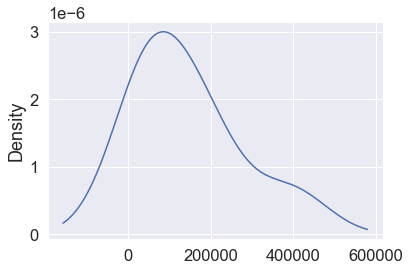

In [10]:
# User Age Distribution
binned_age.plot(kind='kde', label='Age Distribution');

* It shows, more people between age group of 25-34 watch movies.
* Age group is normally distributed

In [11]:
# User rating of the movie “Toy Story”
master.loc[(master.Title == 'Toy Story (1995)'),'Rating'].value_counts()

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

In [12]:
# Top 25 movies by viewership rating
top25 = master.groupby(['Title'])['Rating'].count().sort_values(ascending=False)
top25.head(25)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [13]:
# Find the ratings for all the movies reviewed by for a particular 
# user of user id = 2696
id_2696 = master.loc[master.UserID == 2696,'Rating']
id_2696

95261     3
200536    5
270342    4
274576    3
349333    4
360382    2
448293    3
457193    4
459835    4
464473    2
465069    4
480658    4
493231    4
496926    4
507001    4
631867    2
645948    4
732119    1
851313    4
889623    1
Name: Rating, dtype: int64

#### Feature Engineering

In [14]:
genres = master['Genres'].str.split("|",n=5, expand=True)
genres 

,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Animation,Children's,Comedy,None,None,None
2,Animation,Children's,Comedy,None,None,None
3,Animation,Children's,Comedy,None,None,None
4,Animation,Children's,Comedy,None,None,None
...,...,...,...,...,...,...
1000204,Drama,Thriller,None,None,None,None
1000205,Drama,Thriller,None,None,None,None
1000206,Drama,Thriller,None,None,None,None
1000207,Drama,Thriller,None,None,None,None


In [15]:
type(genres)

pandas.core.frame.DataFrame

In [16]:
genre_list = genres.values.tolist()

### * Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)


In [17]:
# split the data in column genre 
genre = pd.unique(master['Genres'].str.split('|',expand=True).stack())

In [18]:
type(genre)

numpy.ndarray

In [19]:
# Making a list with unique values
genre.tolist()

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Documentary',
 'War',
 'Musical',
 'Mystery',
 'Film-Noir',
 'Western']

### * Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [20]:
genre_dummies = pd.get_dummies(master['Genres'].str.split('|',expand=True).stack()).max(level=0)
# remove duplicates by 'max'
genre_dummies

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000205,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000206,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000207,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [21]:
type(genre_dummies)

pandas.core.frame.DataFrame

### * Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 


In [22]:
master.shape

(1000209, 10)

In [23]:
master_df = pd.concat([master.drop('Genres',axis=1),genre_dummies],axis=1)
master_df

,MovieID,Title,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,5,978824268,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),6,4,978237008,F,50,9,55117,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),8,4,978233496,M,25,12,11413,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),9,5,978225952,M,25,17,61614,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),10,5,978226474,F,35,1,95370,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",5812,4,992072099,F,25,7,92120,0,...,0,0,0,0,0,0,0,1,0,0
1000205,3952,"Contender, The (2000)",5831,3,986223125,M,25,1,92120,0,...,0,0,0,0,0,0,0,1,0,0
1000206,3952,"Contender, The (2000)",5837,4,1011902656,M,25,7,60607,0,...,0,0,0,0,0,0,0,1,0,0
1000207,3952,"Contender, The (2000)",5927,1,979852537,M,35,14,10003,0,...,0,0,0,0,0,0,0,1,0,0


### * Determine the features affecting the ratings of any particular movie.
* Develop an appropriate model to predict the movie ratings

In [24]:
# Correlation
master.corr()

,MovieID,UserID,Rating,Timestamp,Age,Occupation
MovieID,1.000000,-0.017739,-0.064042,0.041632,0.027575,0.008585
UserID,-0.017739,1.000000,0.012303,-0.490383,0.034688,-0.026698
Rating,-0.064042,0.012303,1.000000,-0.026770,0.056869,0.006753
Timestamp,0.041632,-0.490383,-0.026770,1.000000,-0.064562,0.015646
Age,0.027575,0.034688,0.056869,-0.064562,1.000000,0.078371
Occupation,0.008585,-0.026698,0.006753,0.015646,0.078371,1.000000


In [25]:
master.shape

(1000209, 10)

In [26]:
master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [27]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [28]:
master.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [29]:
pd.unique(master_df['Gender'])

array(['F', 'M'], dtype=object)

In [30]:
master_df['Gender'] = master_df['Gender'].map({'M':0, 'F':1})

In [31]:
master_df.head()

,MovieID,Title,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,5,978824268,1,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),6,4,978237008,1,50,9,55117,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),8,4,978233496,0,25,12,11413,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),9,5,978225952,0,25,17,61614,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),10,5,978226474,1,35,1,95370,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
print(pd.unique(master_df['Title']))

['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'Tigerland (2000)' 'Two Family House (2000)' 'Contender, The (2000)']


In [33]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
master_df['Title'] = label_encode.fit_transform(master['Title'])

In [34]:
# master_df['Title'] = pd.get_dummies(master['Title'])

In [35]:
master_df['Zip-code'] = label_encode.fit_transform(master_df['Zip-code'])

In [36]:
master_df.head()

,MovieID,Title,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,3411,1,5,978824268,1,1,10,1588,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3411,6,4,978237008,1,50,9,1863,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3411,8,4,978233496,0,25,12,488,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3411,9,5,978225952,0,25,17,2106,0,...,0,0,0,0,0,0,0,0,0,0
4,1,3411,10,5,978226474,1,35,1,3188,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 27 columns):
 #   Column       Non-Null Count    Dtype
---  ------       --------------    -----
 0   MovieID      1000209 non-null  int64
 1   Title        1000209 non-null  int32
 2   UserID       1000209 non-null  int64
 3   Rating       1000209 non-null  int64
 4   Timestamp    1000209 non-null  int64
 5   Gender       1000209 non-null  int64
 6   Age          1000209 non-null  int64
 7   Occupation   1000209 non-null  int64
 8   Zip-code     1000209 non-null  int32
 9   Action       1000209 non-null  uint8
 10  Adventure    1000209 non-null  uint8
 11  Animation    1000209 non-null  uint8
 12  Children's   1000209 non-null  uint8
 13  Comedy       1000209 non-null  uint8
 14  Crime        1000209 non-null  uint8
 15  Documentary  1000209 non-null  uint8
 16  Drama        1000209 non-null  uint8
 17  Fantasy      1000209 non-null  uint8
 18  Film-Noir    1000209 non-null  uint8
 19  

In [38]:
# Checking missing values
master.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [39]:
from scipy.stats import chi2_contingency

np.set_printoptions(suppress=True)

In [40]:
cat = ['Title','Gender','Zip-code']
num = ['MovieID','UserID','Rating','Timestamp','Age','Occupation']

In [41]:
corr_df = master[num]
corr    = corr_df.corr(method='pearson')
corr

,MovieID,UserID,Rating,Timestamp,Age,Occupation
MovieID,1.000000,-0.017739,-0.064042,0.041632,0.027575,0.008585
UserID,-0.017739,1.000000,0.012303,-0.490383,0.034688,-0.026698
Rating,-0.064042,0.012303,1.000000,-0.026770,0.056869,0.006753
Timestamp,0.041632,-0.490383,-0.026770,1.000000,-0.064562,0.015646
Age,0.027575,0.034688,0.056869,-0.064562,1.000000,0.078371
Occupation,0.008585,-0.026698,0.006753,0.015646,0.078371,1.000000


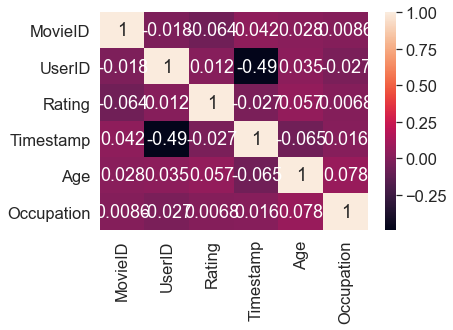

In [42]:
sns.heatmap(corr,annot=True);

* There's no strong relation between the variables.The strongest negative correlation is between UserID and Timestamp(-0.49)

In [43]:
# Chi2 test to check the relation between Categorical variable
for col in cat:
    c_sq = chi2_contingency(pd.crosstab(master['Rating'], master[col]))
    print("Column : {}, the p-value: {:15.10F}".format(col, c_sq[1]))

Column : Title, the p-value:    0.0000000000
Column : Gender, the p-value:    0.0000000000
Column : Zip-code, the p-value:    0.0000000000


- p-values for columns Title, Gender and Zip-code are very low. So we can conclude that these features are independant and has no relationship with target variable

In [49]:
# apply anova 
x= master_df.drop('Rating',axis=1).values
y= master_df['Rating'].values
model = ols('y ~ x', data=master_df).fit()

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1668.
Date:                Fri, 30 Oct 2020   Prob (F-statistic):               0.00
Time:                        17:39:48   Log-Likelihood:            -1.5088e+06
No. Observations:             1000209   AIC:                         3.018e+06
Df Residuals:                 1000182   BIC:                         3.018e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7704      0.102     56.444      0.000       5.570       5.971
x[0]       -5.574e-05   1.03e-06    -54.174      0.000   -5.78e-05   -5.37e-05
x[1]        1.381e-05   1.02e-06     13.589      0.000    1.18e-05    1.58e-05
x[2]        -2.83e-06   7.28e-07     -3.886      0.000   -4.26e-06    -1.4e-06
x[3]        -2.36e-09   1.04e-10    -22.762      0.000   -2.56e-09   -2.16e-09
x[4]           0.0328      0.003     12.682      0.000       0.028       0.038
x[5]           0.0040   9.43e-05     42.488      0.000       0.004       0.004
x[6]           0.0011      0.000      6.777      0.000       0.001       0.001
x[7]       -3.839e-06   1.09e-06     -3.524      0.000   -5.97e-06    -1.7e-06
x[8]          -0.1025      0.003    -32.726      0.000      -0.109      -0.096
x[9]          -0.0073      0.004     -1.950      0.051      -0.015    3.87e-05
x[10]          0.3765      0.007     54.470      0.000       0.363       0.390
x[11]         -0.3425      0.006    -60.244      0.000      -0.354      -0.331
x[12]         -0.0096      0.003     -3.341      0.001      -0.015      -0.004
x[13]          0.0780      0.004     18.432      0.000       0.070       0.086
x[14]          0.3953      0.013     31.288      0.000       0.371       0.420
x[15]          0.2242      0.003     76.572      0.000       0.218       0.230
x[16]          0.0668      0.006     10.454      0.000       0.054       0.079
x[17]          0.4263      0.009     49.174      0.000       0.409       0.443
x[18]         -0.2834      0.004    -63.604      0.000      -0.292      -0.275
x[19]          0.1346      0.006     22.481      0.000       0.123       0.146
x[20]          0.0058      0.006      0.977      0.329      -0.006       0.017
x[21]         -0.0375      0.003    -11.562      0.000      -0.044      -0.031
x[22]         -0.0300      0.003     -8.882      0.000      -0.037      -0.023
x[23]          0.0455      0.003     13.980      0.000       0.039       0.052
x[24]          0.2745      0.005     60.358      0.000       0.266       0.283
x[25]          0.1014      0.008     12.993      0.000       0.086       0.117
==============================================================================
Omnibus:                    46419.605   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49745.724
Skew:                          -0.523   Prob(JB):                         0.00
Kurtosis:                       2.682   Cond. No.                     9.09e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
""

In [51]:
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
x,26.0,5.187111e+04,1995.042718,1667.974166,0.0
Residual,1000182.0,1.196305e+06,1.196087,NaN,NaN


In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp = pairwise_tukeyhsd(master_df.Rating, master_df.Age)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1     18  -0.0419 0.001 -0.0633 -0.0206   True
     1     25  -0.0043   0.9 -0.0249  0.0163  False
     1     35   0.0686 0.001  0.0474  0.0899   True
     1     45   0.0885 0.001  0.0656  0.1115   True
     1     50    0.165 0.001  0.1416  0.1884   True
     1     56   0.2171 0.001  0.1911  0.2431   True
    18     25   0.0377 0.001  0.0284  0.0469   True
    18     35   0.1106 0.001  0.0999  0.1212   True
    18     45   0.1305 0.001  0.1168  0.1442   True
    18     50   0.2069 0.001  0.1925  0.2214   True
    18     56   0.2591 0.001  0.2407  0.2774   True
    25     35   0.0729 0.001  0.0639   0.082   True
    25     45   0.0928 0.001  0.0803  0.1053   True
    25     50   0.1693 0.001   0.156  0.1826   True
    25     56   0.2214 0.001  0.2039  0.2389   True
    35     45   0.0199 0.001  0.0064  0.0334   True
    35     5

### Develop an appropriate model to predict the movie ratings
- __Decision Tree__

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x = master_df.drop('Rating',axis=1).values
y = master_df.Rating.values

In [55]:
train, test = train_test_split(master_df, test_size=0.25, random_state=1)

In [56]:
x_tr = train.drop('Rating',axis=1)
y_tr = train.Rating
x_te = test.drop('Rating',axis=1)
y_te = test.Rating

In [57]:
from sklearn.tree import DecisionTreeClassifier

__Decision Tree 1__

In [58]:
dt = DecisionTreeClassifier()
dt.fit(x_tr, y_tr)

DecisionTreeClassifier()

In [59]:
imp = list(dt.feature_importances_)
imp

[0.05926364377183602,
 0.04760149211731625,
 0.18563639880607835,
 0.2105477879916744,
 0.024302777050386477,
 0.07162085089333155,
 0.12436196376362627,
 0.23972117226159054,
 0.0026743982415859593,
 0.0021886553395027487,
 0.0007744598122599825,
 0.0017383867186981537,
 0.0048542579473854755,
 0.0023720414733695073,
 0.0005390679226332333,
 0.0037849808480679295,
 0.0008841273032192561,
 0.0010226414828290158,
 0.0012422041029453575,
 0.0010776015379313493,
 0.0013949391721466559,
 0.0033666796037869593,
 0.0022373364292508054,
 0.0044330469858602116,
 0.001556825036455598,
 0.0008022633862319655]

In [60]:
feature_imp = [(feature, round(imp,2)) for feature, 
               imp in zip(x_tr.columns, imp)]
feature_imp

[('MovieID', 0.06),
 ('Title', 0.05),
 ('UserID', 0.19),
 ('Timestamp', 0.21),
 ('Gender', 0.02),
 ('Age', 0.07),
 ('Occupation', 0.12),
 ('Zip-code', 0.24),
 ('Action', 0.0),
 ('Adventure', 0.0),
 ('Animation', 0.0),
 ("Children's", 0.0),
 ('Comedy', 0.0),
 ('Crime', 0.0),
 ('Documentary', 0.0),
 ('Drama', 0.0),
 ('Fantasy', 0.0),
 ('Film-Noir', 0.0),
 ('Horror', 0.0),
 ('Musical', 0.0),
 ('Mystery', 0.0),
 ('Romance', 0.0),
 ('Sci-Fi', 0.0),
 ('Thriller', 0.0),
 ('War', 0.0),
 ('Western', 0.0)]

In [61]:
feature_imp = sorted(feature_imp, key = lambda x: x[1], reverse = True)
feature_imp

[('Zip-code', 0.24),
 ('Timestamp', 0.21),
 ('UserID', 0.19),
 ('Occupation', 0.12),
 ('Age', 0.07),
 ('MovieID', 0.06),
 ('Title', 0.05),
 ('Gender', 0.02),
 ('Action', 0.0),
 ('Adventure', 0.0),
 ('Animation', 0.0),
 ("Children's", 0.0),
 ('Comedy', 0.0),
 ('Crime', 0.0),
 ('Documentary', 0.0),
 ('Drama', 0.0),
 ('Fantasy', 0.0),
 ('Film-Noir', 0.0),
 ('Horror', 0.0),
 ('Musical', 0.0),
 ('Mystery', 0.0),
 ('Romance', 0.0),
 ('Sci-Fi', 0.0),
 ('Thriller', 0.0),
 ('War', 0.0),
 ('Western', 0.0)]

In [62]:
feature_imp = pd.DataFrame(feature_imp, columns=['feature','importance'])

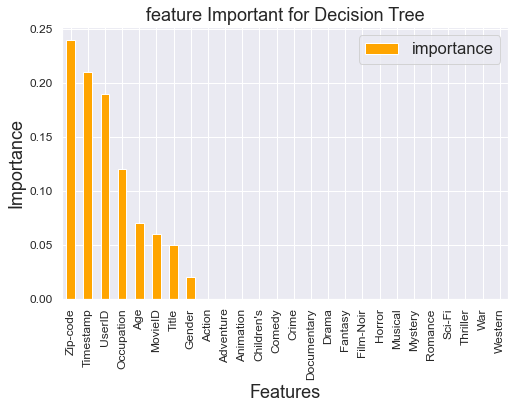

In [63]:
ax = feature_imp.plot(kind='bar',
                     x = 'feature',
                     y = 'importance',
                     figsize = (8, 5),
                     title = 'feature Important for Decision Tree',
                     grid = True,
                     legend = True,
                     fontsize=12,
                     color='orange')
ax.set_xlabel('Features')
ax.set_ylabel('Importance');

In [64]:
y_pred = dt.predict(x_te)

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_te, y_pred)

array([[ 2784,  2801,  3893,  3170,  1427],
       [ 2788,  4946,  8249,  7455,  3409],
       [ 4027,  8583, 19861, 21819, 11206],
       [ 3300,  7891, 21952, 33202, 20659],
       [ 1532,  3584, 11033, 20361, 20121]], dtype=int64)

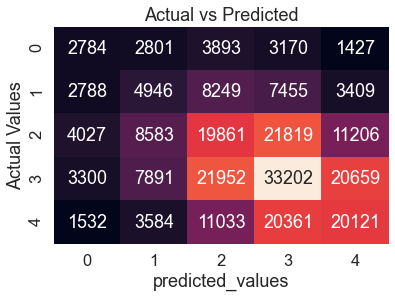

In [66]:
sns.heatmap(confusion_matrix(y_te, y_pred), annot=True, fmt='d',cbar=False)
plt.xlabel('predicted_values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted');

In [67]:
print('model accuracy: ', accuracy_score(y_te, y_pred)*100)

model accuracy:  32.35873994713121


- It gives model accuracy 32.35%

In [68]:
pred_prob = dt.predict_proba(x_te)[:, 1]

In [69]:
from sklearn import metrics
fpr2, tpr2, thresholds = metrics.roc_curve(y_te, pred_prob, pos_label=1)

In [70]:
thresholds

array([2., 1., 0.])

In [71]:
auc_dt = metrics.auc(fpr2, tpr2)
auc_dt

0.5465231492588638

In [72]:
print(classification_report(y_te,y_pred))

              precision    recall  f1-score   support

           1       0.19      0.20      0.20     14075
           2       0.18      0.18      0.18     26847
           3       0.31      0.30      0.30     65496
           4       0.39      0.38      0.38     87004
           5       0.35      0.36      0.35     56631

    accuracy                           0.32    250053
   macro avg       0.28      0.28      0.28    250053
weighted avg       0.32      0.32      0.32    250053



__Decision Tree with Prunning 2__

In [73]:
# Prunning
dt1 = DecisionTreeClassifier(min_samples_leaf= 30,
                            min_samples_split =70 )

In [74]:
dt1.fit(x_tr, y_tr)

DecisionTreeClassifier(min_samples_leaf=30, min_samples_split=70)

In [75]:
prun_tr_pred = dt1.predict(x_tr)

In [76]:
prun_te_pred = dt1.predict(x_te)

In [77]:
confusion_matrix(y_te, prun_te_pred)

array([[ 2327,  2280,  4811,  3765,   892],
       [ 1738,  3164, 10367,  9427,  2151],
       [ 1653,  4005, 23038, 28771,  8029],
       [  775,  2389, 22034, 43919, 17887],
       [  230,   662,  8523, 26053, 21163]], dtype=int64)

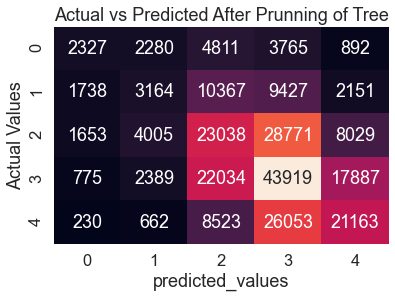

In [78]:
sns.heatmap(confusion_matrix(y_te, prun_te_pred), annot=True, fmt='d',cbar=False)
plt.xlabel('predicted_values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted After Prunning of Tree');

In [79]:
print('model accuracy: ', accuracy_score(y_te, prun_te_pred)*100)

model accuracy:  37.43646346974441


- It gives model accuracy 37.43%. Accuracy increase little after prunning.

In [80]:
prun_pred_prob = dt1.predict_proba(x_te)[:, 1]

In [81]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_te, prun_pred_prob, pos_label=1)

In [82]:
thresholds

array([1.63793103, 0.63793103, 0.63333333, 0.625     , 0.61290323,
       0.60606061, 0.6       , 0.59375   , 0.58536585, 0.58064516,
       0.575     , 0.57446809, 0.57352941, 0.57142857, 0.56666667,
       0.56410256, 0.5625    , 0.56097561, 0.55882353, 0.55813953,
       0.55555556, 0.55      , 0.5483871 , 0.54545455, 0.54285714,
       0.54054054, 0.53658537, 0.53623188, 0.53488372, 0.53333333,
       0.53125   , 0.52941176, 0.52830189, 0.52777778, 0.52173913,
       0.52      , 0.51785714, 0.51612903, 0.51515152, 0.51470588,
       0.51428571, 0.51219512, 0.51111111, 0.5106383 , 0.50980392,
       0.50769231, 0.5       , 0.49230769, 0.49206349, 0.48979592,
       0.48888889, 0.48837209, 0.48780488, 0.48717949, 0.48648649,
       0.48571429, 0.48484848, 0.48387097, 0.48148148, 0.48076923,
       0.47916667, 0.47761194, 0.47727273, 0.47619048, 0.47540984,
       0.475     , 0.47368421, 0.47272727, 0.47222222, 0.47058824,
       0.46875   , 0.46774194, 0.46666667, 0.46551724, 0.46511

In [83]:
auc_dt1 = metrics.auc(fpr2, tpr2)
auc_dt1

0.7304480144888722

In [84]:
print(classification_report(y_te,prun_te_pred))

              precision    recall  f1-score   support

           1       0.35      0.17      0.22     14075
           2       0.25      0.12      0.16     26847
           3       0.33      0.35      0.34     65496
           4       0.39      0.50      0.44     87004
           5       0.42      0.37      0.40     56631

    accuracy                           0.37    250053
   macro avg       0.35      0.30      0.31    250053
weighted avg       0.37      0.37      0.36    250053



__Decision tree 2 with prunning and change in parameter__

In [85]:
dt2 = DecisionTreeClassifier(min_samples_leaf = 100,
                             min_samples_split = 300)

In [86]:
dt2.fit(x_tr, y_tr)

DecisionTreeClassifier(min_samples_leaf=100, min_samples_split=300)

In [87]:
prun1_te_pred = dt2.predict(x_te)

In [88]:
accuracy_score(y_te, prun1_te_pred)

0.3946923252270519

- It gives the model accuracy 39.46%. It also increase the accuracy.

In [89]:
print(classification_report(y_te, prun1_te_pred))

              precision    recall  f1-score   support

           1       0.37      0.16      0.22     14075
           2       0.28      0.06      0.10     26847
           3       0.35      0.35      0.35     65496
           4       0.40      0.59      0.47     87004
           5       0.46      0.37      0.41     56631

    accuracy                           0.39    250053
   macro avg       0.37      0.31      0.31    250053
weighted avg       0.39      0.39      0.37    250053



__Model Linear Regression__

In [91]:
train, test = train_test_split(master_df, test_size=0.25, random_state=1)

In [92]:
x = train.drop('Rating',axis=1)
y = train.Rating

In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [98]:
lr.fit(x, y)

LinearRegression()

In [99]:
y_pred = lr.predict(x)

In [100]:
print('Beta 0 = {} \nCoefficient = {}'.format(lr.intercept_,lr.coef_))

Beta 0 = 5.816477877100297 
Coefficient = [-0.00005527  0.00001339 -0.00000281 -0.          0.0307668   0.00393113
  0.00099333 -0.0000028  -0.10187324 -0.00929697  0.37570539 -0.33970473
 -0.00785888  0.07977919  0.39861546  0.2266772   0.06569974  0.42587945
 -0.27815269  0.13246316  0.00870057 -0.0378955  -0.03228329  0.04822785
  0.27707993  0.10057828]


In [101]:
print('Rsquared = ', round(lr.score(x, y)*100, 3))

Rsquared =  4.153


In [102]:
from sklearn.metrics import mean_squared_error
print('MSE = ' , mean_squared_error(y, y_pred))

MSE =  1.1957896410687878
